# Code to extract features from Inception v3 and save to file

Monday, January 29, 2018

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

from keras.applications.inception_v3 import InceptionV3
#from keras.applications.xception import Xception
from keras.preprocessing import image
# from keras.models import Model
#from keras.layers import GlobalAveragePooling2D

# #Default InceptionV3 options:
# #https://keras.io/applications/#inceptionv3
#
# For pre-trained weights, input_shape has to be  (299, 299, 3) (with 'channels_last' data format)
# or (3, 299, 299) (with 'channels_first' data format).
#
# Note that image.load_img() uses 'channels_last' by default, and you need to
# specify target_size = (299,299) when loading an image to feed into InceptionV3.
#
# keras.applications.inception_v3.InceptionV3(include_top=True
#                                             , weights='imagenet'
#                                             , input_tensor=None
#                                             , input_shape=None
#                                             , pooling=None
#                                             , classes=1000)

Using TensorFlow backend.


In [2]:
import os
from PIL import Image
#Hash images using the ImageHash library
#https://pypi.python.org/pypi/ImageHash
import imagehash

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#Use pretrained ImageNet weights, leaving out the top layer, and compress the output to
#a 2-tensor using Global Average Pooling
inceptionv3 = InceptionV3(include_top=False, weights='imagenet', pooling='avg')

In [5]:
inceptionv3.layers_by_depth[0]

In [6]:
inceptionv3.input.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [7]:
inceptionv3.output.shape

TensorShape([Dimension(None), Dimension(2048)])

## Test how to find and load image files

In [8]:
with os.scandir() as iterator:
    for f in iterator:
        print(f.name, f.path, f.is_dir(), f.is_file())

.DS_Store ./.DS_Store False True
LICENSE ./LICENSE False True
web ./web True False
__pycache__ ./__pycache__ True False
build_a_model.ipynb ./build_a_model.ipynb False True
README.md ./README.md False True
feature_extraction.ipynb ./feature_extraction.ipynb False True
.gitignore ./.gitignore False True
try_out_inception_v3.ipynb ./try_out_inception_v3.ipynb False True
tree_photos ./tree_photos True False
.ipynb_checkpoints ./.ipynb_checkpoints True False
.git ./.git True False
data ./data True False
src ./src True False


In [9]:
[os.path.split(filename) for filename in os.listdir()]

[('', '.DS_Store'),
 ('', 'LICENSE'),
 ('', 'web'),
 ('', '__pycache__'),
 ('', 'build_a_model.ipynb'),
 ('', 'README.md'),
 ('', 'feature_extraction.ipynb'),
 ('', '.gitignore'),
 ('', 'try_out_inception_v3.ipynb'),
 ('', 'tree_photos'),
 ('', '.ipynb_checkpoints'),
 ('', '.git'),
 ('', 'data'),
 ('', 'src')]

In [10]:
[os.path.splitext(filename) for filename in os.listdir()]

[('.DS_Store', ''),
 ('LICENSE', ''),
 ('web', ''),
 ('__pycache__', ''),
 ('build_a_model', '.ipynb'),
 ('README', '.md'),
 ('feature_extraction', '.ipynb'),
 ('.gitignore', ''),
 ('try_out_inception_v3', '.ipynb'),
 ('tree_photos', ''),
 ('.ipynb_checkpoints', ''),
 ('.git', ''),
 ('data', ''),
 ('src', '')]

In [11]:
with os.scandir('tree_photos') as iterator:
    for f in iterator:
        print(f.name, f.path, f.is_dir(), f.is_file())

.DS_Store tree_photos/.DS_Store False True
thuja_plicata tree_photos/thuja_plicata True False
tilia_cordata tree_photos/tilia_cordata True False
folder_statuses.txt tree_photos/folder_statuses.txt False True
bad_images tree_photos/bad_images True False
cedrus_libani tree_photos/cedrus_libani True False
pseudotsuga_menziesii tree_photos/pseudotsuga_menziesii True False
picea_sitchensis tree_photos/picea_sitchensis True False
geckodriver.log tree_photos/geckodriver.log False True
acer_macrophylum tree_photos/acer_macrophylum True False
scrape_trees.ipynb tree_photos/scrape_trees.ipynb False True
betula_papyrifera tree_photos/betula_papyrifera True False
.ipynb_checkpoints tree_photos/.ipynb_checkpoints True False
platanus_acerifolia tree_photos/platanus_acerifolia True False
alnus_rubra tree_photos/alnus_rubra True False


### Test whether loading an image with keras and PIL give the same hashvalue

In [12]:
photo_dir = 'tree_photos/picea_sitchensis'
[filename for filename in os.listdir(photo_dir)][:5]

['image_picea_sitchensis_27.png',
 'image_picea_sitchensis_33.png',
 'image_picea_sitchensis_6.png',
 'image_picea_sitchensis_in_winter_12.png',
 'image_sitka_spruce_59.png']

<class 'PIL.Image.Image'>


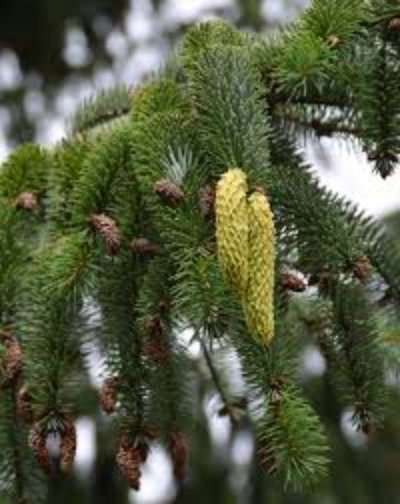

In [13]:
image_path = os.path.join(photo_dir, 'image_picea_sitchensis_27.png')
keras_img = image.load_img(image_path)
print(type(keras_img))
keras_img

<class 'PIL.PngImagePlugin.PngImageFile'>


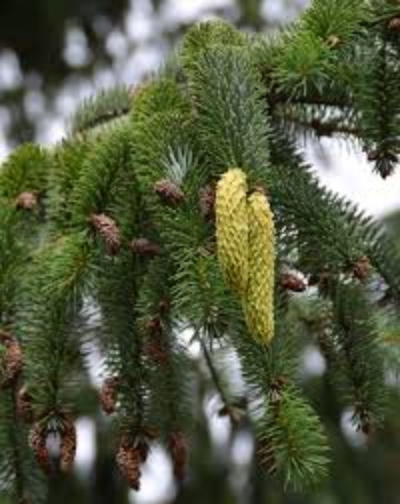

In [14]:
pil_img = Image.open(image_path)
print(type(pil_img))
pil_img

In [15]:
print(imagehash.phash(keras_img))
print(imagehash.phash(pil_img))
print(imagehash.phash(keras_img) - imagehash.phash(pil_img))
print(imagehash.phash(keras_img) == imagehash.phash(pil_img))

99a7465a1e99acb4
99a7465a1e99acb4
0
True


#### Yes, same!

### Now test whether loading in the image with the desired target size (299, 299) gives the same hashvalue as the raw image

<class 'PIL.Image.Image'>


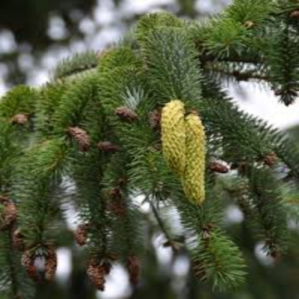

In [16]:
keras_img_299 = image.load_img(image_path, target_size=(299,299))
print(type(keras_img_299))
keras_img_299

In [17]:
print(imagehash.phash(keras_img_299))
print(imagehash.phash(keras_img))
print(imagehash.phash(keras_img) - imagehash.phash(keras_img_299))
print(imagehash.phash(keras_img) == imagehash.phash(keras_img_299))

99a7465a1e99acb4
99a7465a1e99acb4
0
True


#### Woo hoo! Yes, still the same hash!

### For all image files in the listed directories, store the following in a dataframe:

* hash of the image (as a unique id)
* filename relative to the species directory (could also use this as unique id, hopefully)
* species (which should equal the directory in which the image is located)
* Once the above information is stored, pass each image through the Inception V3 feature extractor to get a list of 2048 features in a numpy array. Add 2048 colums to the dataframe for these features.

In [18]:
base_directory = 'tree_photos'
species_names = ['picea_sitchensis', 'platanus_acerifolia', 'acer_macrophylum']
image_extensions = ['.png', '.jpg', '.jpeg']
#species_paths = [os.path.join(base_directory, species_name) for species_name in species_names]

In [19]:
tree_images_df = pd.DataFrame(columns=['p_hash', 'filename', 'species', 'tags'])

In [20]:
len(tree_images_df)

0

In [21]:
def add_images_to_df(image_df, base_directory, species_names=None, skip_duplicates=False):
    #If no species names are passed, use all subfolders of the base folder as species names
    if species_names is None:
        with os.scandir(base_directory) as base_contents:
            species_names = [entry.name for entry in base_contents if entry.is_dir()]
    
    #Get the current length of the dataframe -- we'll be adding rows to the end, one for each image file found
    row_num = len(image_df)
    
    #Iterate through the species names, which are assumed to be subfolders of the base directory.
    for species_name in species_names:
        
        #Get the full path to the species folder
        species_directory = os.path.join(base_directory, species_name)

        #Get all the DirEntry objects in the folder, and add the relevant information to the dataframe
        with os.scandir(species_directory) as dir_entries:
            for dir_entry in dir_entries:
                #Skip anything that's not an image file
                if os.path.splitext(dir_entry.name)[1] not in image_extensions:
                    continue

                #Use Keras to load the image file into a PIL image object with the correct target size
                #for InceptionV3
                img = image.load_img(dir_entry.path, target_size=(299,299))

                #Refer to https://pypi.python.org/pypi/ImageHash for imagehash documentation.
                #imagehash.phash(img) computes the perception hash of the image (http://www.phash.org/).
                #Note that this hash SHOULDN'T change if the image is loaded in with a target_size
                #different from (299,299), but it's probably best to always use the same target size 
                #just to be safe.
                p_hash = str(imagehash.phash(img))
                
                #Create a new row containing the data for the current file
                new_row = pd.Series({'p_hash': p_hash
                                    , 'filename': dir_entry.name
                                    , 'species': species_name
                                    , 'tags': ''})
                
                #If skip_duplicates is True, check whether the dataframe already has an image with
                #the same hash, and only add it if not.
                if skip_duplicates and p_hash in image_df['p_hash'].values:
                    print("Dataframe already contains an image with this hash value: {}".format(new_row))
                    continue
                
                image_df.loc[row_num] = new_row
                row_num += 1

In [22]:
add_images_to_df(tree_images_df, base_directory, species_names)
tree_images_df.head()

,p_hash,filename,species,tags
0,99a7465a1e99acb4,image_picea_sitchensis_27.png,picea_sitchensis,
1,93d12f8e712ef068,image_picea_sitchensis_33.png,picea_sitchensis,
2,cce3482eb991533b,image_picea_sitchensis_6.png,picea_sitchensis,
3,c119991c4fcf1cda,image_picea_sitchensis_in_winter_12.png,picea_sitchensis,
4,e3c3dab100fdc29c,image_sitka_spruce_59.png,picea_sitchensis,


In [23]:
tree_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Data columns (total 4 columns):
p_hash      1014 non-null object
filename    1014 non-null object
species     1014 non-null object
tags        1014 non-null object
dtypes: object(4)
memory usage: 39.6+ KB


In [24]:
tree_images_df['species'].value_counts() #good, these are the right counts

acer_macrophylum       370
platanus_acerifolia    335
picea_sitchensis       309
Name: species, dtype: int64

In [25]:
len(tree_images_df['p_hash'].unique()) #good, all the hash values are unique

1014

## Try to recreate an ImageHash object from the hash string

In [26]:
img_hash = imagehash.phash(keras_img)
type(img_hash)

imagehash.ImageHash

In [27]:
img_hash

array([[ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True,  True, False],
       [False,  True, False,  True,  True, False,  True, False],
       [False, False, False,  True,  True,  True,  True, False],
       [ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False,  True,  True, False, False],
       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)

In [28]:
hash_string = str(img_hash)
hash_string

'99a7465a1e99acb4'

In [29]:
imagehash.hex_to_hash(hash_string)

array([[ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True,  True, False],
       [False,  True, False,  True,  True, False,  True, False],
       [False, False, False,  True,  True,  True,  True, False],
       [ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False,  True,  True, False, False],
       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)

In [30]:
#Don't do this (initialize ImageHash object with a string) -- it will eventually result in an error:
#AttributeError: 'str' object has no attribute 'flatten'
new_hash_object = imagehash.ImageHash(hash_string)

In [31]:
new_hash_object

'99a7465a1e99acb4'

In [32]:
type(new_hash_object)

imagehash.ImageHash

In [33]:
#The correct initialization is with the corresponding binary array:
new_hash_object2 = imagehash.ImageHash(imagehash.hex_to_hash(hash_string))

In [34]:
new_hash_object2

array([[ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True,  True, False],
       [False,  True, False,  True,  True, False,  True, False],
       [False, False, False,  True,  True,  True,  True, False],
       [ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False,  True,  True, False, False],
       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)

In [35]:
new_hash_object2.hash

array([[ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True,  True, False],
       [False,  True, False,  True,  True, False,  True, False],
       [False, False, False,  True,  True,  True,  True, False],
       [ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False,  True,  True, False, False],
       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)

In [36]:
type(new_hash_object2)

imagehash.ImageHash

In [37]:
#This throws an error: 'ImageHash' object has no attribute 'flatten'
# img_hash == new_hash_object2

#But this works:
img_hash == new_hash_object2.hash

True

In [38]:
img_hash.__repr__()

'array([[ True, False, False,  True,  True, False, False,  True],\n       [ True, False,  True, False, False,  True,  True,  True],\n       [False,  True, False, False, False,  True,  True, False],\n       [False,  True, False,  True,  True, False,  True, False],\n       [False, False, False,  True,  True,  True,  True, False],\n       [ True, False, False,  True,  True, False, False,  True],\n       [ True, False,  True, False,  True,  True, False, False],\n       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)'

In [39]:
new_hash_object2.__repr__()

'array([[ True, False, False,  True,  True, False, False,  True],\n       [ True, False,  True, False, False,  True,  True,  True],\n       [False,  True, False, False, False,  True,  True, False],\n       [False,  True, False,  True,  True, False,  True, False],\n       [False, False, False,  True,  True,  True,  True, False],\n       [ True, False, False,  True,  True, False, False,  True],\n       [ True, False,  True, False,  True,  True, False, False],\n       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)'

In [40]:
img_hash.__str__()

'99a7465a1e99acb4'

In [41]:
new_hash_object2.hash.__str__()

'99a7465a1e99acb4'

### Apparently this is a correct way to initialize a new hash object... Seems kind of broken...

In [42]:
new_hash_object3 = imagehash.ImageHash(imagehash.hex_to_hash(hash_string)).hash

In [43]:
type(new_hash_object3)

imagehash.ImageHash

In [44]:
new_hash_object3 == img_hash

True

In [45]:
new_hash_object3.hash

array([[ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True,  True, False],
       [False,  True, False,  True,  True, False,  True, False],
       [False, False, False,  True,  True,  True,  True, False],
       [ True, False, False,  True,  True, False, False,  True],
       [ True, False,  True, False,  True,  True, False, False],
       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)

In [46]:
hash(new_hash_object3)

941

In [47]:
hash(img_hash)

941

In [48]:
imagehash.hex_to_hash(hash_string) == img_hash

True

## Save dataframe to a .csv for later use

In [83]:
tree_images_df.to_csv('data/tree_image_info.csv', sep='|')

In [84]:
!ls data

tree_image_info.csv tree_images.csv


In [85]:
!head data/tree_image_info.csv

|p_hash|filename|species|tags
0|99a7465a1e99acb4|image_picea_sitchensis_27.png|picea_sitchensis|
1|93d12f8e712ef068|image_picea_sitchensis_33.png|picea_sitchensis|
2|cce3482eb991533b|image_picea_sitchensis_6.png|picea_sitchensis|
3|c119991c4fcf1cda|image_picea_sitchensis_in_winter_12.png|picea_sitchensis|
4|e3c3dab100fdc29c|image_sitka_spruce_59.png|picea_sitchensis|
5|84522fbc57bd21a9|image_sitka_spruce_65.png|picea_sitchensis|
6|ff6042c59f3870e2|image_sitka_spruce_71.png|picea_sitchensis|
7|aeae42b4fa96050f|image_sitka_spruce_cones_58.png|picea_sitchensis|
8|fb90080905fe47bf|image_sitka_spruce_cones_70.png|picea_sitchensis|


### Estimate some storage requirements

In [52]:
#This is how many floats you would need to represent each raw image.
#It's more than 100x larger than the 2048 numbers that InceptionV3 would output.
299*299*3

268203

In [53]:
#64 bits is 8 bytes, so the total number of bytes a 299x299 image should require is about 2.15 MB:
299*299*3*8

2145624

In [59]:
#By contrast, the 2048 features from InceptionV3 should take up about 16.4 kB:
2048*8

16384

In [82]:
#So for 1014 images, the storage for all their features in memory should be about 16.6 MB:
2048*8*1014

16613376

## Now extract features from photos using InceptionV3, and save to .csv

In [70]:
tree_images_df.loc[400,'species']

'platanus_acerifolia'

In [73]:
[row for row in tree_images_df.index][:5]

[0, 1, 2, 3, 4]

In [61]:
num_features = inceptionv3.output.shape[1].value #=2048
feature_columns = ['incv3_out_{}'.format(i) for i in range(num_features)]

In [76]:
def extract_features(image_df, base_directory):
    #Create array to store each image as a 3-tensor
    image_array = np.empty((len(image_df), 299, 299, 3))
    print('Loading images...')
    for row in image_df.index:
        image_path = os.path.join(base_directory, image_df.loc[row,'species'], image_df.loc[row,'filename'])
        img = image.load_img(image_path, target_size=(299,299))
        image_array[row] = image.img_to_array(img)
        #image_array_df.iloc[row] = image.img_to_array(img)
    
    print('Images loaded. Extracting features...')
    features = inceptionv3.predict(image_array)
    
    print('Features extracted. Returning new dataframe.')
    features_df = pd.DataFrame(features, columns=feature_columns)
    
    return image_df.join(features_df)

In [77]:
tree_features_df = extract_features(tree_images_df, base_directory)

Loading images...
Images loaded. Extracting features...
Features extracted. Returning new dataframe.


#### It took maybe 10 seconds to load all 1014 images

Started extracting features around 11:35am (Tue 1/30/18). Finished around 11:44am, so about 9 minutes for 1014 files.

In [78]:
tree_features_df.head()

,p_hash,filename,species,tags,incv3_out_0,incv3_out_1,incv3_out_2,incv3_out_3,incv3_out_4,incv3_out_5,...,incv3_out_2038,incv3_out_2039,incv3_out_2040,incv3_out_2041,incv3_out_2042,incv3_out_2043,incv3_out_2044,incv3_out_2045,incv3_out_2046,incv3_out_2047
0,99a7465a1e99acb4,image_picea_sitchensis_27.png,picea_sitchensis,,13.995308,1.316715,0.279829,67.839417,43.733177,38.206165,...,160.387985,1.176492,45.983730,10.465877,22.118896,3.226861,29.401524,0.486684,0.000000,15.634432
1,93d12f8e712ef068,image_picea_sitchensis_33.png,picea_sitchensis,,7.449574,0.417233,0.447665,6.178374,2.092985,6.251201,...,2.649559,0.523397,0.392520,7.703988,13.842188,12.907540,1.112756,0.000000,5.436511,1.154409
2,cce3482eb991533b,image_picea_sitchensis_6.png,picea_sitchensis,,0.708871,0.640444,1.305804,9.565918,15.157275,1.787687,...,15.114614,0.000000,0.066235,2.280773,8.082823,1.939496,0.041136,0.000000,0.000000,0.034437
3,c119991c4fcf1cda,image_picea_sitchensis_in_winter_12.png,picea_sitchensis,,7.138457,1.225646,15.940742,42.644821,23.604031,13.818824,...,49.895081,0.000000,7.600242,3.260593,13.135204,12.249097,17.588070,0.000000,0.000000,0.000000
4,e3c3dab100fdc29c,image_sitka_spruce_59.png,picea_sitchensis,,0.030419,2.616714,1.435360,52.145359,5.377345,5.631077,...,13.391465,21.970516,5.217728,8.282942,0.788009,0.591635,35.845409,0.000000,0.000000,2.780651


In [79]:
tree_features_df.to_csv('data/tree_images.csv', sep='|')

In [87]:
!ls -l data

total 75512
-rw-r--r--  1 ndbs  staff     74715 Jan 30 12:03 tree_image_info.csv
-rw-r--r--  1 ndbs  staff  37792669 Jan 30 11:46 tree_images.csv


#### So the new .csv file is about 37.8 MB with extracted features added, as opposed to 75 KB without extracted features

In [86]:
tree_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Columns: 2052 entries, p_hash to incv3_out_2047
dtypes: float32(2048), object(4)
memory usage: 8.0+ MB
